In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import itertools
import matplotlib.pyplot as plt 
import numpy as np

from template.smoothings.one_smoothing import OneSmoothing
from template.graphics.plot_one_smoothing import plot_curves, plot_surfaces

Top 5 combinations minimizing the GCV criterion
sp1		Objective
0.1		9.123306605766421
0.01		9.316733743666106
1.0		9.524234897536807
10.0		15.728444795029523
Starting the optimization algorithm
sp1		Objective
2.17997e-01	9.10520e+00
1.32980e-01	9.11084e+00
1.91016e-01	9.10414e+00
1.91441e-01	9.10414e+00
1.91434e-01	9.10414e+00
1.91434e-01	9.10414e+00


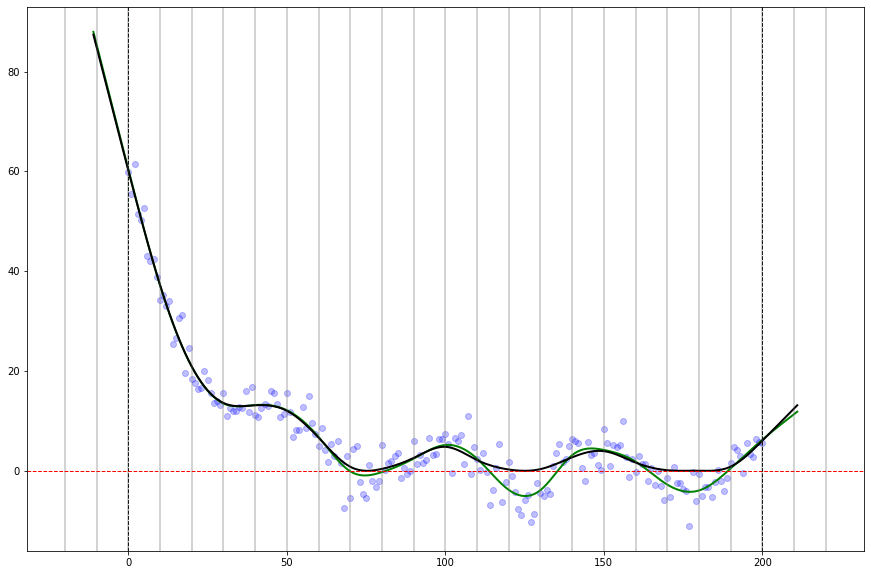

In [3]:
np.random.seed(5)
x1 = np.linspace(0, 200, 201)
y1 = np.exp(4 - x1 / 25) + 4 * np.cos(x1 / 8) + np.random.normal(0, 3, 201)

example1_1 = OneSmoothing(
    deg=[3],
    ord_d=[2],
    n_int=[20],
    sp_method="grid_search",
    sp_args={"verbose": True},
    x_range={0: (-11, 211)}
)
example1_1.fit(x=[x1], y=y1)

example1_2 = OneSmoothing(
    deg=[3],
    ord_d=[2],
    n_int=[20],
    sp_method="optimizer",
    sp_args={"verbose": True},
    x_range={0: (-11, 211)},
    int_constraints={0: {0: {"+": 0}}}
)
example1_2.fit(x=[x1], y=y1)

plot_1 = plot_curves(
    fittings=[example1_1, example1_2],
    col_curve=["g", "k"],
    knot_positions=True,
    constant_constraints=True,
    x=[x1], 
    y=[y1],
    col_pt=["b"],
    alpha=0.25
)

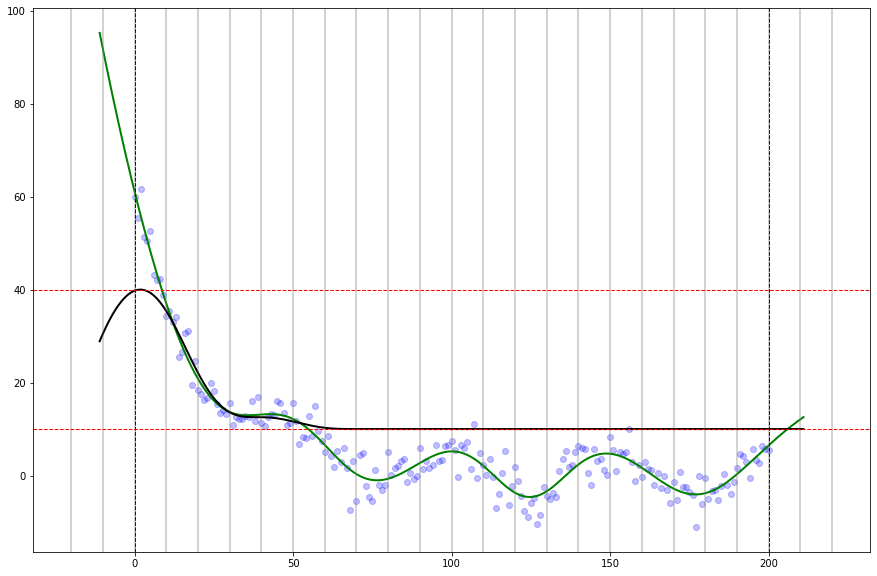

In [4]:
np.random.seed(5)
x2 = np.linspace(0, 200, 201)
y2 = np.exp(4 - x2 / 25) + 4 * np.cos(x2 / 8) + np.random.normal(0, 3, 201)
example2_1 = OneSmoothing(
    deg=[5],
    ord_d=[3],
    n_int=[20],
    x_range={0: (-11, 211)},
)
example2_1.fit(x=[x2], y=y2)

example2_2 = OneSmoothing(
    deg=[5],
    ord_d=[3],
    n_int=[20],
    x_range={0: (-11, 211)},
    int_constraints={0: {0: {"+": 10, "-": 40}}}
)
example2_2.fit(x=[x2], y=y2)

plot_2 = plot_curves(
    fittings=[example2_1, example2_2],
    col_curve=["g", "k"],
    knot_positions=True,
    constant_constraints=True,
    x=[x2], 
    y=[y2],
    col_pt=["b"],
    alpha=0.25
)

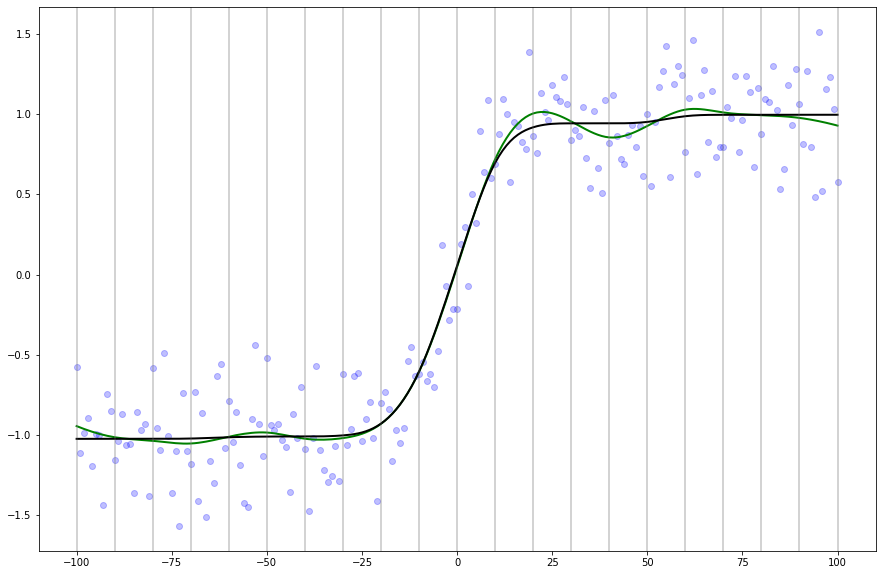

In [5]:
np.random.seed(7)
x3 = np.linspace(-100, 100, 201)
y3 = np.tanh(x3 / 10) + np.random.normal(0, 0.25, 201)

example3_1 = OneSmoothing(
    deg=[3],
    ord_d=[2],
    n_int=[20],
)
example3_1.fit(x=[x3], y=y3)

example3_2 = OneSmoothing(
    deg=[3],
    ord_d=[2],
    n_int=[20],
    int_constraints={0: {1: {"+": 0}}}
)
example3_2.fit(x=[x3], y=y3)

plot_3 = plot_curves(
    fittings=[example3_1, example3_2],
    col_curve=["g", "k"],
    knot_positions=True,
    constant_constraints=True,
    x=[x3], 
    y=[y3],
    col_pt=["b"],
    alpha=0.25
)

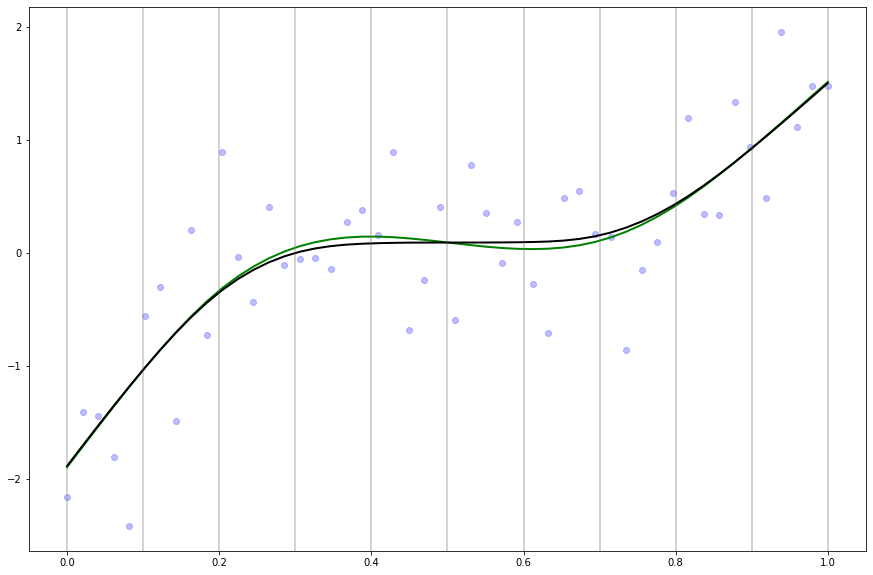

In [6]:
np.random.seed(6)
x4 = np.linspace(0, 1, 50)
y4 =  2 * (2 * x4 - 1) ** 3 + np.random.normal(0, 0.5, 50)

example4_1 = OneSmoothing(
    deg=[3],
    ord_d=[2],
    n_int=[10],
)
example4_1.fit(x=[x4], y=y4)

example4_2 = OneSmoothing(
    deg=[3],
    ord_d=[2],
    n_int=[10],
    int_constraints={0: {1: {"+": 0}}}
)
example4_2.fit(x=[x4], y=y4)

plot_4 = plot_curves(
    fittings=[example4_1, example4_2],
    col_curve=["g", "k"],
    knot_positions=True,
    constant_constraints=True,
    x=[x4], 
    y=[y4],
    col_pt=["b"],
    alpha=0.25
)

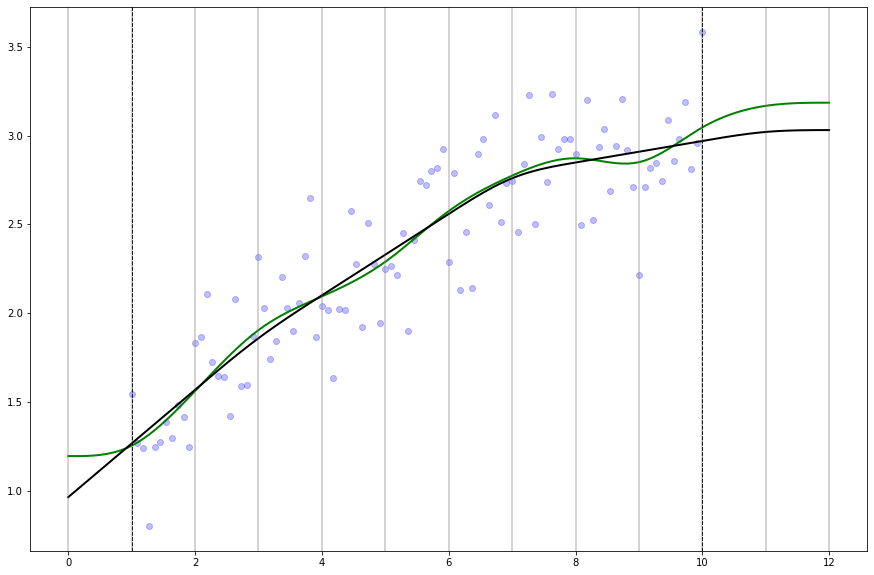

In [7]:
np.random.seed(3)
x5 = np.linspace(1, 10, 100)
y5 = np.log(2 * x5 + 1) + np.random.normal(0, 0.25, 100)

example5_1 = OneSmoothing(
    deg=[3],
    ord_d=[1],
    n_int=[9],
    x_range={0: (0, 12)}
)
example5_1.fit(x=[x5], y=y5)

example5_2 = OneSmoothing(
    deg=[3],
    ord_d=[1],
    n_int=[9],
    x_range={0: (0, 12)},
    int_constraints={0: {1: {"+": 0}, 2: {"-": 0}}}
)
example5_2.fit(x=[x5], y=y5)

plot_5 = plot_curves(
    fittings=[example5_1, example5_2],
    col_curve=["g", "k"],
    knot_positions=True,
    constant_constraints=True,
    prediction_step=(0.05, 0.05),
    x=[x5], 
    y=[y5],
    col_pt=["b"],
    alpha=0.25
)

Top 5 combinations minimizing the GCV criterion
sp1		sp2		Objective
10.0		10.0		1.0082503674821623
1.0		10.0		1.009022677326074
10.0		1.0		1.0090578738146416
10.0		0.1		1.0097061176566544
0.1		10.0		1.0098077982989115


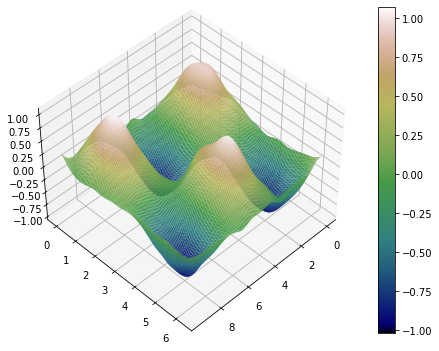

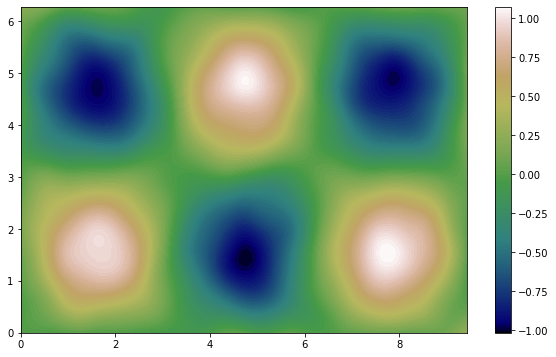

In [8]:
np.random.seed(5)
x6_0 = np.linspace(0, 3 * np.pi, 300)
x6_1 = np.linspace(0, 2 * np.pi, 200)
y6 = np.outer(np.sin(x6_0), np.sin(x6_1)) + np.random.normal(0, 1, (300, 200))
example6 = OneSmoothing(
    deg=[3, 3],
    ord_d=[2, 2],
    n_int=[30, 20],
    sp_method="grid_search",
    sp_args={"verbose": True},
)
example6.fit(x=[x6_0, x6_1], y=y6)

plot6 = plot_surfaces(
    fittings=[example6],
    col_surface=["gist_earth"],
    orientation=(45,45),
    figsize=(10, 6),
)

Starting the optimization algorithm
sp1		sp2		Objective
1.00062e+00	1.00055e+00	1.01027e+00
1.00370e+00	1.00332e+00	1.01027e+00
1.01904e+00	1.01708e+00	1.01025e+00
1.09437e+00	1.08470e+00	1.01017e+00
1.44017e+00	1.39507e+00	1.00988e+00
2.31791e+00	2.18295e+00	1.00942e+00
3.42373e+00	3.17561e+00	1.00907e+00
5.19874e+00	4.76898e+00	1.00874e+00
7.77395e+00	7.08069e+00	1.00845e+00
1.16205e+01	1.05337e+01	1.00819e+00
1.73002e+01	1.56322e+01	1.00796e+00
2.56386e+01	2.31174e+01	1.00777e+00
3.75947e+01	3.38501e+01	1.00760e+00
5.36640e+01	4.82752e+01	1.00748e+00
7.22795e+01	6.49859e+01	1.00740e+00
9.03308e+01	8.11903e+01	1.00737e+00
1.00930e+02	9.07045e+01	1.00736e+00
1.03378e+02	9.29026e+01	1.00736e+00
1.04689e+02	9.40791e+01	1.00736e+00
1.04153e+02	9.35982e+01	1.00736e+00
1.04072e+02	9.35252e+01	1.00736e+00


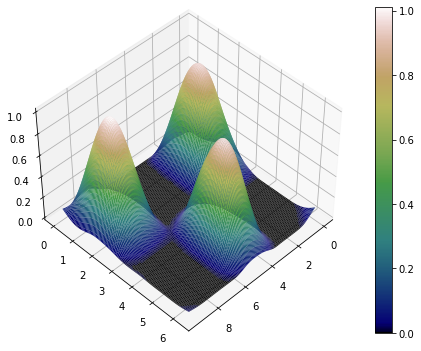

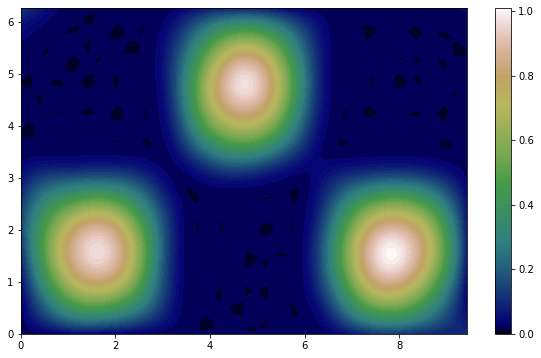

In [9]:
np.random.seed(5)
x7_0 = np.linspace(0, 3 * np.pi, 300)
x7_1 = np.linspace(0, 2 * np.pi, 200)
y7 = np.outer(np.sin(x7_0), np.sin(x7_1)) + np.random.normal(0, 1, (300, 200))
example7 = OneSmoothing(
    deg=[3, 3],
    ord_d=[2, 2],
    n_int=[30, 20],
    sp_args={"verbose": True},
    int_constraints={0: {0: {"+": 0}}, 1: {0: {"+": 0}}}
)
example7.fit(x=[x7_0, x7_1], y=y7)

plot7 = plot_surfaces(
    fittings=[example7],
    col_surface=["gist_earth"],
    orientation=(45, 45),
    figsize=(10, 6),
)

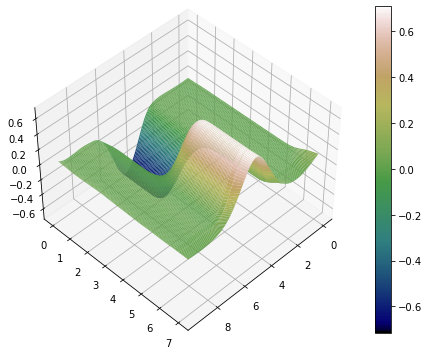

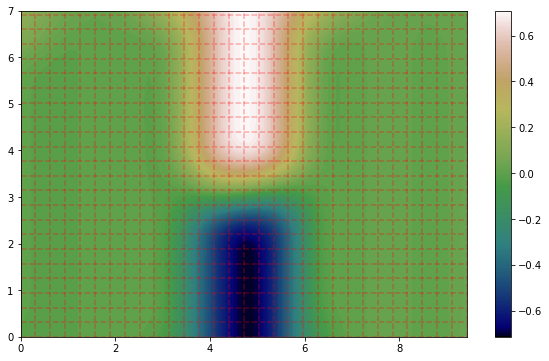

In [10]:
np.random.seed(5)
x8_0 = np.linspace(0, 3 * np.pi, 300)
x8_1 = np.linspace(0, 2 * np.pi, 200)
y8 = np.outer(np.sin(x8_0), np.sin(x8_1)) + np.random.normal(0, 1, (300, 200))
example8 = OneSmoothing(
    deg=[3, 3],
    ord_d=[2, 2],
    n_int=[30, 20],
    x_range={1: (7,)},
    int_constraints={1: {1: {"+": 0}}}
)
example8.fit(x=[x8_0, x8_1], y=y8)

plot8 = plot_surfaces(
    fittings=[example8],
    col_surface=["gist_earth"],
    orientation=(45, 45),
    figsize=(10, 6),
    knot_positions=True
)

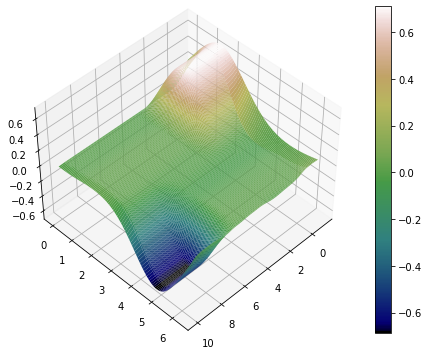

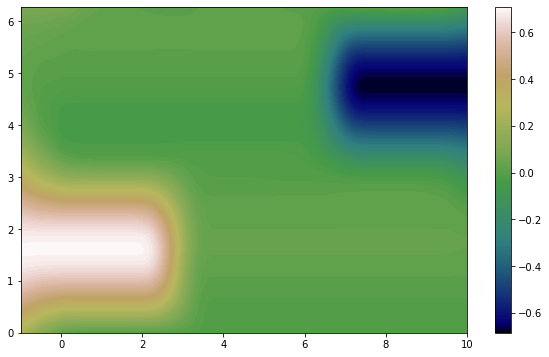

In [11]:
np.random.seed(5)
x9_0 = np.linspace(0, 3 * np.pi, 300)
x9_1 = np.linspace(0, 2 * np.pi, 200)
y9 = np.outer(np.sin(x9_0), np.sin(x9_1)) + np.random.normal(0, 1, (300, 200))
example9 = OneSmoothing(
    deg=[3, 3],
    ord_d=[2, 2],
    n_int=[30, 20],
    x_range={0: (-1,10)},
    int_constraints={0: {1: {"-": 0}}}
)
example9.fit(x=[x9_0, x9_1], y=y9)

plot9 = plot_surfaces(
    fittings=[example9],
    col_surface=["gist_earth"],
    orientation=(45, 45),
    figsize=(10, 6)
)

Starting the optimization algorithm
sp1		sp2		sp3		Objective
9.99380e-01	9.99894e-01	9.99985e-01	5.80970e-04
9.96280e-01	9.99362e-01	9.99911e-01	5.78992e-04
9.80790e-01	9.96708e-01	9.99538e-01	5.69120e-04
9.03548e-01	9.83472e-01	9.97683e-01	5.20301e-04
5.22752e-01	9.18229e-01	9.88536e-01	2.91328e-04
1.00000e-10	8.28622e-01	9.75976e-01	4.14606e-05
1.00000e-10	8.28622e-01	9.75976e-01	4.14606e-05


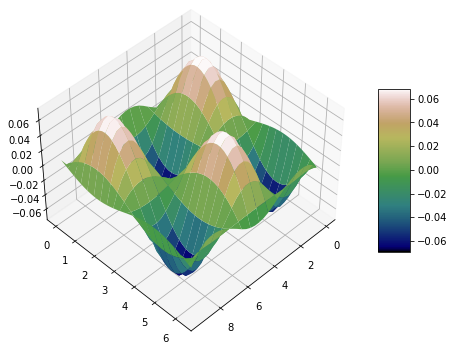

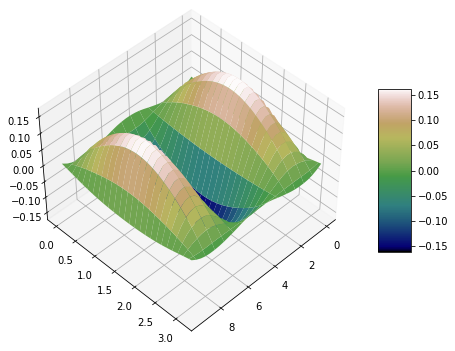

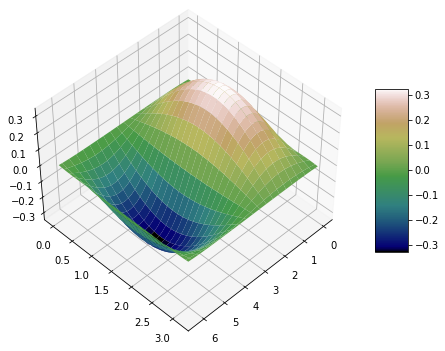

In [12]:
x10_0 = np.linspace(0, 3 * np.pi, 30)
x10_1 = np.linspace(0, 2 * np.pi, 40)
x10_2 = np.linspace(0, 1 * np.pi, 50)
y10 = np.einsum('i,j,k->ijk',np.sin(x10_0), np.sin(x10_1), np.sin(x10_2))

example10 = OneSmoothing(
    deg=[2, 3, 4],
    ord_d=[1, 2, 2],
    n_int=[8, 9, 10],
    sp_args={"verbose": True, "optim_options": {"ftol": 1e-7}},
)
example10.fit(x=[x10_0, x10_1, x10_2], y=y10)

x_comb = list(itertools.combinations([x10_0, x10_1, x10_2], 2))
y_comb = [example10.y_fitted[:, :, 1],
          example10.y_fitted[:, 1, :],
          example10.y_fitted[1, :, :]]

for x, y in zip(x_comb, y_comb):
    Z, X = np.meshgrid(*x)
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111, projection="3d")
    surf = ax.plot_surface(
        Z,
        X,
        y.T,
        cmap=plt.get_cmap("gist_earth"),
        rstride=2,
        cstride=2,
    )
    _ = ax.view_init(45, 45)
    _ = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)


Top 5 combinations minimizing the GCV criterion
sp1		sp2		sp3		Objective
0.1		0.2		0.3		4.464843803374018e-05
0.1		0.5		0.3		5.7239117847016575e-05
0.4		0.2		0.3		0.00016054981093356426
0.4		0.5		0.3		0.00018545204212726423


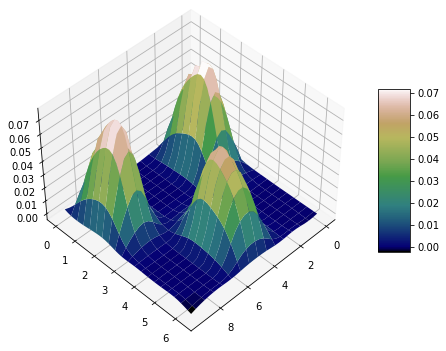

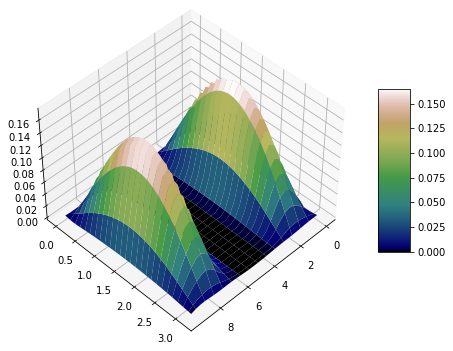

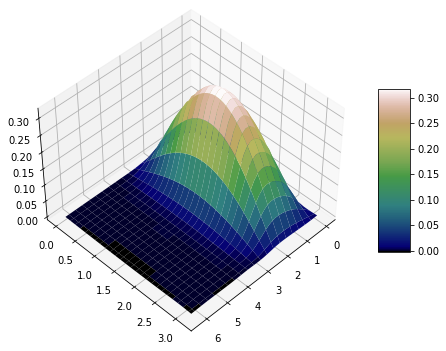

In [13]:
x11_0 = np.linspace(0, 3 * np.pi, 30)
x11_1 = np.linspace(0, 2 * np.pi, 40)
x11_2 = np.linspace(0, 1 * np.pi, 50)
y11 = np.einsum('i,j,k->ijk',np.sin(x11_0), np.sin(x11_1), np.sin(x11_2))

example11 = OneSmoothing(
    deg=[2, 3, 4],
    ord_d=[1, 2, 2],
    n_int=[8, 9, 10],
    sp_method="grid_search",
    sp_args={"grid": [[0.1, 0.4], [0.2, 0.5], [0.3]], "verbose": True, "parallel": True},
    int_constraints={0: {0: {"+": 0}}, 1: {0: {"+": 0}}, 2: {0: {"+": 0}}}
)
example11.fit(x=[x11_0, x11_1, x11_2], y=y11)


x_comb = list(itertools.combinations([x11_0, x11_1, x11_2], 2))
y_comb = [example11.y_fitted[:, :, 1],
          example11.y_fitted[:, 1, :],
          example11.y_fitted[1, :, :]]

for x, y in zip(x_comb, y_comb):
    Z, X = np.meshgrid(*x)
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111, projection="3d")
    surf = ax.plot_surface(
        Z,
        X,
        y.T,
        cmap=plt.get_cmap("gist_earth"),
        rstride=2,
        cstride=2,
    )
    _ = ax.view_init(45, 45)
    _ = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)


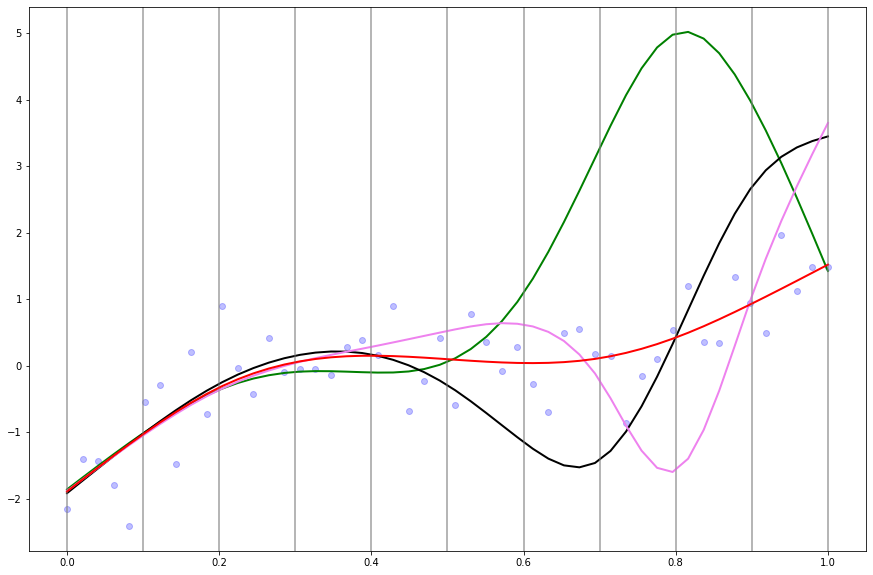

In [14]:
np.random.seed(6)
x12 = np.linspace(0, 1, 50)
y12 =  2 * (2 * x12 - 1) ** 3 + np.random.normal(0, 0.5, 50)

example12_1 = OneSmoothing(
    deg=[3],
    ord_d=[2],
    n_int=[10],
    pt_constraints={(0,): [[np.array([0.8])], np.array([5]), 1e-8]}
)
example12_1.fit(x=[x12], y=y12)

example12_2 = OneSmoothing(
    deg=[3],
    ord_d=[2],
    n_int=[10],
    pt_constraints={(1,): [[np.array([0.8])], np.array([25]), 1e-8]}
)
example12_2.fit(x=[x12], y=y12)

example12_3 = OneSmoothing(
    deg=[3],
    ord_d=[2],
    n_int=[10],
    pt_constraints={(2,): [[np.array([0.8])], np.array([700]), 1e-8]}
)
example12_3.fit(x=[x12], y=y12)


example12_4 = OneSmoothing(
    deg=[3],
    ord_d=[2],
    n_int=[10],
)
example12_4.fit(x=[x12], y=y12)

plot12 = plot_curves(
    fittings=[example12_1, example12_2, example12_3, example12_4],
    col_curve=["g", "k", "violet", "r"],
    knot_positions=True,
    constant_constraints=True,
    x=[x12], 
    y=[y12],
    col_pt=["b"],
    alpha=0.25
)

Top 5 combinations minimizing the GCV criterion
sp1		sp2		Objective
1.0		1.0		1.0060678021303715
0.1		1.0		1.0191920654771596
1.0		0.1		1.019351342660935
1.0		10.0		1.0311853464031002
1.0		0.01		1.0365786885070432


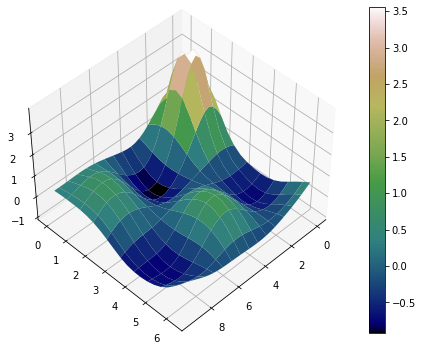

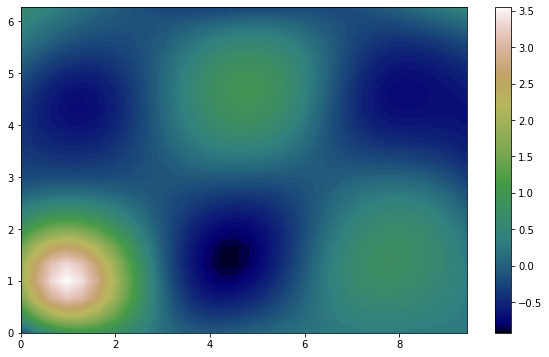

In [15]:
np.random.seed(5)
x13_0 = np.linspace(0, 3 * np.pi, 30)
x13_1 = np.linspace(0, 2 * np.pi, 20)
y13 = np.outer(np.sin(x13_0), np.sin(x13_1)) + np.random.normal(0, 1, (30, 20))
example13 = OneSmoothing(
    deg=[3, 3],
    ord_d=[2, 2],
    n_int=[10, 9],
    sp_method="grid_search",
    sp_args={"verbose": True},
    pt_constraints={(0,0): [[np.array([1]), np.array([1])], np.array([4]), 1e-8]}
)
example13.fit(x=[x13_0, x13_1], y=y13)

plot13 = plot_surfaces(
    fittings=[example13],
    col_surface=["gist_earth"],
    orientation=(45, 45),
    figsize=(10, 6),
)